In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import sys
from normalize_data import getNormalizedDataset

In [2]:
df = getNormalizedDataset()
df.shape
df['mes'] = df['fecha'].dt.month
df['año'] = df['fecha'].dt.year

(230396, 18)
(230060, 18)
(230041, 18)
(220417, 19)


In [3]:
# Revisemos la cantidad de publicaciones por tipo de propiedad 
# y nos quedamos con las que tengan mas de 1000 publicaciones.
df3 = df.groupby('tipodepropiedad').agg(promedio_m2=('precio_m2','mean'), tamano=('tipodepropiedad', 'size')).reset_index()
df3.sort_values(by='tamano', ascending=False)

df3[df3['tamano'] > 1000]

# Se pueden observar 4 del tipo comerciales. Hagamos un analisis mas profundo al respecto.

,tipodepropiedad,promedio_m2,tamano
0,Apartamento,21102.82,55106
1,Bodega comercial,8900.60,1017
2,Casa,10935.26,129590
3,Casa en condominio,13973.27,17460
10,Local Comercial,16665.84,2590
14,Oficina comercial,22213.52,1549
18,Terreno,5202.17,8912
19,Terreno comercial,7768.31,1180


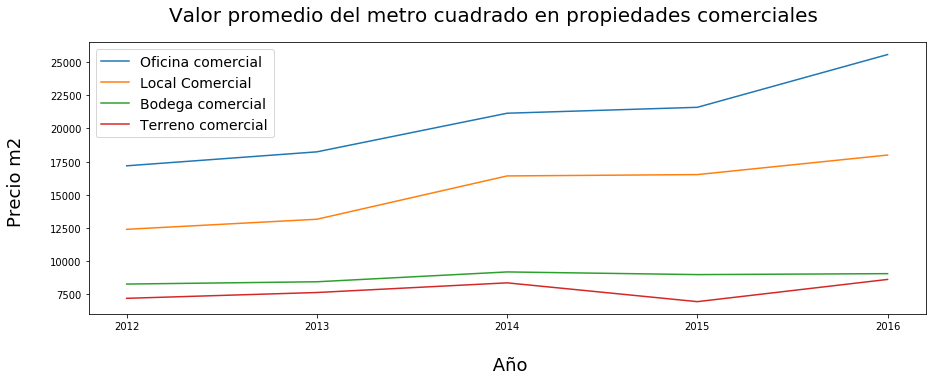

In [4]:
# Me quedo solo con los comerciales y grafico el promedio del m2 en el tiempo para cada uno.
comerciales = df3[(df3['tamano'] < 3000) & (df3['tamano'] > 1000)].sort_values(by="promedio_m2", ascending=False).tipodepropiedad.unique().to_list()
comerciales
dfcomerciales = df[df['tipodepropiedad'].isin(comerciales)]

fig, ax1 = plt.subplots(1,1, figsize=(15,5))

fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Valor promedio del metro cuadrado en propiedades comerciales',fontsize=20)

dfcomerciales = dfcomerciales.groupby(['año', 'tipodepropiedad']).agg(precio_m2=('precio_m2', 'mean')).reset_index()

for i in comerciales: 
    dfplot = dfcomerciales[dfcomerciales['tipodepropiedad'] == i]
    ax1.plot(dfplot.año,\
            dfplot.precio_m2,\
            label=i)

plt.xticks([2012,2013,2014,2015,2016])    
ax1.set_xlabel("\n Año", fontsize=18)
ax1.set_ylabel("Precio m2 \n", fontsize=18)
ax1.legend(loc='best', title_fontsize=16, fontsize=14)


In [5]:

# Resulta interesante entonces que el comportamiento de la Oficina comercial y el del local comercial son similares.
# Mientras que el de el terreno comercial y la bodega comercial tambien son similares.

# Entonces se toma la decision de agrupar oficina comercial y local comercial, bodega comercial y terreno comercial.
# Se remueven todas las otras propiedades.

df.loc[df['tipodepropiedad'] == 'Oficina comercial', ['tipodepropiedad']] = 'Local Comercial'
df.loc[df['tipodepropiedad'] == 'Bodega comercial', ['tipodepropiedad']] = 'Terreno comercial'
df3 = df.groupby('tipodepropiedad').agg(promedio_m2=('precio_m2','mean'), tamano=('tipodepropiedad', 'size')).reset_index()
propiedades_validas = df3[df3['tamano'] > 1000].tipodepropiedad.unique().to_list()

df = df[df['tipodepropiedad'].isin(propiedades_validas)]
df['tipodepropiedad'].cat.remove_unused_categories(inplace=True)
df['tipodepropiedad'].unique()


[Apartamento, Casa en condominio, Casa, Terreno, Local Comercial, Terreno comercial]
Categories (6, object): [Apartamento, Casa en condominio, Casa, Terreno, Local Comercial, Terreno comercial]

ConversionError: Failed to convert value(s) to axis units: ['2012/1', '2013/1', '2014/1', '2015/1', '2016/1']

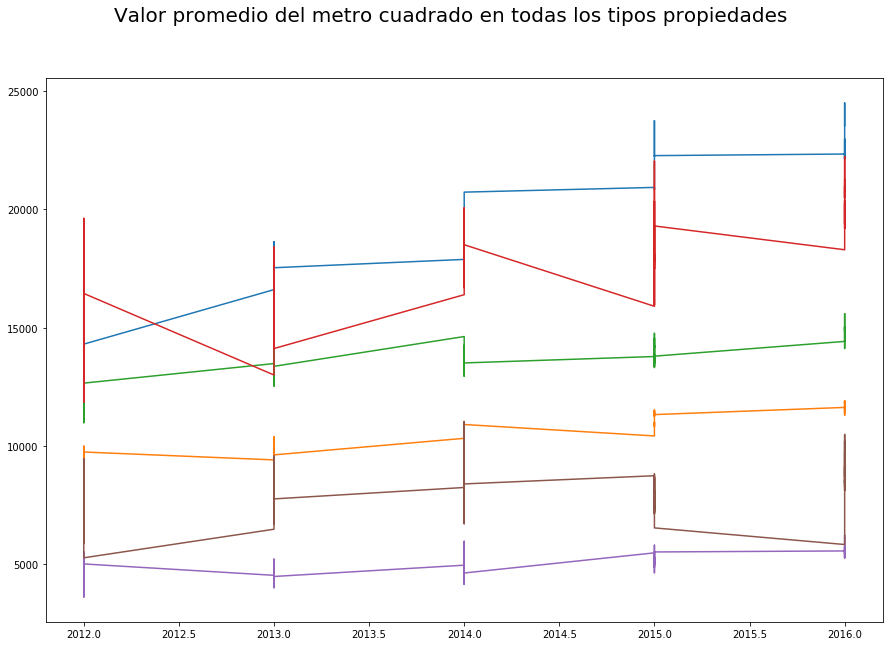

In [79]:
# Teniendo un data set un poco mas uniforme en tipo de propiedades. Grafiquemos la evolucion
# del costo de cada tipo de propiedad historicamente.
df['tipodepropiedad'].cat.categories
# df.shape
fig, ax1 = plt.subplots(1,1, figsize=(15,10))

fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Valor promedio del metro cuadrado en todas los tipos propiedades',fontsize=20)

dfprop = df.groupby(['año', 'mes', 'tipodepropiedad']).agg(precio_m2=('precio_m2', 'mean')).reset_index()

copydf = df.copy()
copydf['dia'] = 1

dfprop['fecha'] = dfprop['año'].map(str) +'/'+ dfprop['mes'].map(str)
dfprop

# for name, nam2, group in dfprop:
#     print(name)


for i in dfprop.tipodepropiedad.cat.categories: 
    dfplot = dfprop[dfprop['tipodepropiedad'] == i]
    ax1.plot(dfplot.año,\
            dfplot.precio_m2,\
            label=i)

plt.xticks(['2012/1','2013/1','2014/1','2015/1','2016/1'])    
ax1.set_xlabel("\n Año", fontsize=18)
ax1.set_ylabel("Precio m2 \n", fontsize=18)
ax1.legend(loc='best', title_fontsize=16, fontsize=14)
